In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import polyfit ,polyval

def cheb(n):
  from numpy.matlib import repmat as repmat
  if n == 0:
    D = 0 ; x = 1
    return D,x
  else:
    x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    c1 = np.array(np.ones(n-1)) ; c1 = np.append(c1,2) ; c1 = np.insert(c1,0,2)
    c2 = (-1)** np.arange(0,n +1,1)
    c = c1 * c2
    X = repmat(np.matrix(x).T,1,n+1)
    dX = X - X.T
    D = (np.matrix(c).T * 1/np.matrix(c)) / (dX+(np.eye(n+1)))
    D = D - np.diagflat(sum(D.T))
    return D,x

Text(0, 0.5, '$\\lambda$')

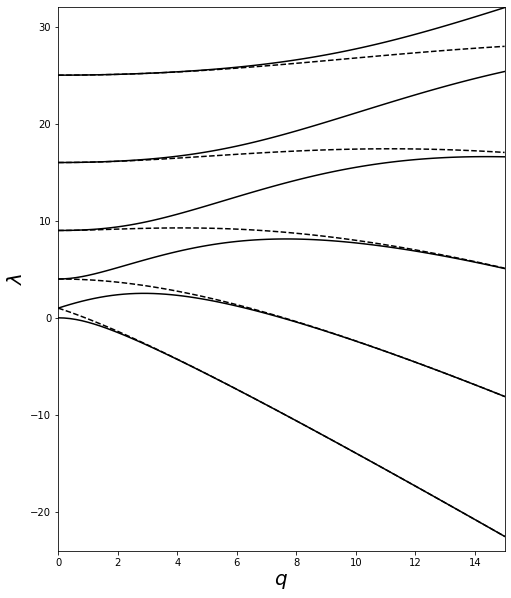

In [ ]:
from scipy.linalg import toeplitz
from numpy.linalg import eigvals

N = 42 ; h = 2*np.pi/N ; x = h*np.arange(1,N +1,1)

A = (-np.pi**2)/(3*h**2)-1/6 ; B = -0.5*(-1)**np.arange(1,N,1)/np.sin(h*np.arange(1,N,1)/2)**2
array = np.append(A,B)

D2 = toeplitz(array)
qq = np.arange(0,15 +0.2,0.2) ; data = []
for q in qq:
  e = sorted(eigvals(-D2 + 2*q*np.diagflat(np.cos(2*x))))
  data = np.append(data,e[0:11])

data = np.reshape(np.real(data),(-1,11))

plt.figure(figsize=(8,10))
for i in np.arange(0,11,1):
  if i%2 == 0:
    plt.plot(qq,data[:,i],color='black')
  else:
    plt.plot(qq,data[:,i],color='black',linestyle="--")
  
plt.xlim(0,15)
plt.ylim(-24,32)
plt.xlabel(r'$q$',fontsize=20)
plt.ylabel(r'$\lambda$',fontsize=20)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


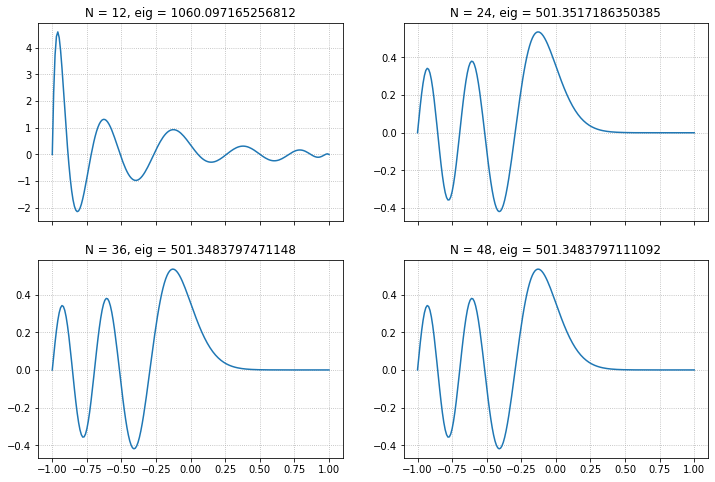

In [ ]:
plt.close()
from scipy.special import airy
from scipy.linalg import eig

fig,ax = plt.subplots(2,2,sharex=True,figsize=(12,8))

for N in np.arange(12,48 +12,12):
  D,x = cheb(N); D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
  X = np.diagflat(x[1:N])
  w,v = eig(D2,X)
  ii = np.where(w>0)[0] ; w = w[w > 0]
  v = v[:,ii] ; index = np.argsort(w)
  ii = np.where(index == 4)[0][0]
  v = np.append(np.insert(v[:,ii],0,0),0) ; w = w[ii]
  v = v/v[int(N/2)]*airy(0)[0]
  xx = np.arange(-1,1+0.01,0.01)
  vv = np.polyval(np.polyfit(x,v,N),xx)
  if N < 25:
    ax[0,int(N/12-1)].plot(xx,vv)
    ax[0,int(N/12-1)].set_title('N = '+str(N)+ ', eig = ' + str(np.real(w)))
    ax[0,int(N/12-1)].grid(linestyle=':')
  else:
    ax[1,int(N/24-1)].plot(xx,vv)
    ax[1,int(N/24-1)].set_title('N = '+str(N)+ ', eig = ' + str(np.real(w)))
    ax[1,int(N/24-1)].grid(linestyle=':')

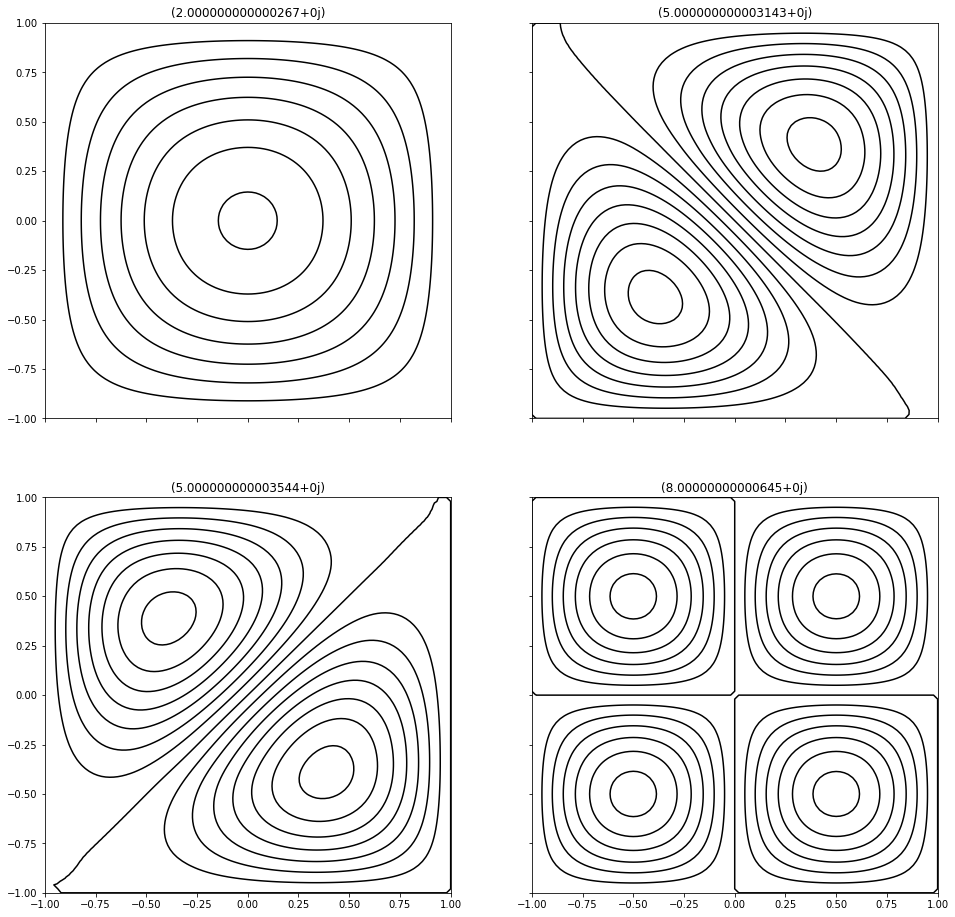

In [ ]:
plt.close()

from scipy.interpolate import interp2d

N = 16
D,x = cheb(N)
y = x
xx, yy = np.meshgrid(x[1:N],y[1:N])
xx = xx.flatten() ; yy = yy.flatten()
D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
I = np.eye(N-1)
L = -np.kron(I,D2) - np.kron(D2,I)
L = L 
D,V = eig(L)
ii = np.argsort(D) ; D = sorted(D)
ii = ii[0:4] ; V = V[:,ii]

xx, yy = np.meshgrid(x,y)

xxx = np.arange(-1,1 +0.02,0.02)
yyy = np.arange(-1,1 +0.02,0.02)

xi, yi =np.meshgrid(xxx,yyy)

uu = np.zeros((N+1,N+1))
ay, ax = np.meshgrid([0.56, 0.04],[0.1,0.5])

fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(16,16))

for i in [0,1,2,3]:
  uu[1:N,1:N] = np.reshape(V[:,i],(N-1,N-1))
  interp_spline = interp2d(xx,yy,uu,kind='cubic')
  uuu = interp_spline(xxx,yyy)
  if i%2 == 0:
    ax[int(i/2),0].contour(xi,yi,uuu,levels=np.arange(-1,1 +0.025,0.025),colors='black',linestyles='-')
    ax[int(i/2),0].set_title(str(4*D[i]/(np.pi**2)))
  else:
    ax[int(i/2),1].contour(xi,yi,uuu,levels=np.arange(-1,1 +0.025,0.025),colors='black',linestyles='-')
    ax[int(i/2),1].set_title(str(4*D[i]/(np.pi**2)))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 <a list of 8 Text major ticklabel objects>)

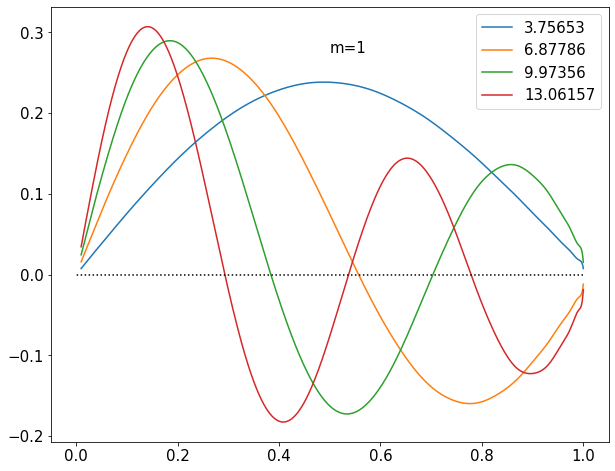

In [ ]:
plt.close()

N=50
D,x = cheb(N) ; r = (x+1)/2
D1 = D ; D1[0] = np.zeros(N+1) ; D1[0,0] = 1
D2 = (D**2) ; D2[0] = np.zeros(N+1) ; D2[0,0] = 1 ; D2[N] = D[N]
m = 1
r_matrix = np.diagflat(r)
m_matrix = np.diagflat(np.full_like(r,m))
L = 4*(r_matrix**2)*D2 + 2*r_matrix*D1 - m_matrix

input2 = np.insert(r[1:N+1],0,0)
B = -np.diagflat(input2**2)

w,v = eig(L,B)
ii = np.argsort(np.sqrt(w)) ; lamb = sorted(np.sqrt(w))
ii = ii[0:4] ; v = v[:,ii]

plt.figure(figsize=(10,8))
for i in [0,1,2,3]:
  rr = np.linspace(0.01,1,10**3,endpoint=True)
  vv = np.polyval(np.polyfit(r[0:N-1],np.real((v[:,i])[0:N-1]),N),rr)
  if m == 1:
    plt.plot(rr,-vv,label=str(round(np.real(lamb[i]),5)))
  elif i == 0:
    plt.plot(rr,-vv,label=str(round(np.real(lamb[i]),5)))
  else:
    plt.plot(rr,vv,label=str(round(np.real(lamb[i]),5)))
plt.plot(r,np.zeros_like(r),color='black',linestyle=':')
plt.legend(fontsize=15)
plt.text(0.5,0.275,'m='+str(m),fontsize=15)
plt.xticks(fontsize=15) ; plt.yticks(fontsize=15)